In [468]:
import os
import torch
import operator
import matplotlib as plt
from pylab import *
import torch.nn as nn
import torchaudio
import numpy as np
import pandas as pd
from tqdm import notebook

from glob import glob

In [3]:
data_dir = "D:\\Music\\Sample Packs\\"

In [4]:
paths = [path.lower() for path in glob(f'{data_dir}/**/*.wav', recursive=True)]
len(paths)
print(paths[123])

d:\music\sample packs\1. delifb chill future bass & trap sounds\kicks\kick 9.wav


### 24 Categories, 17 Genres, 46 Styles

In [398]:
count = 0
category = ["drum", "kick", "snare", "foley", "percussion", "clap", "cymbal", "crash", "tom", "rim", "bell", "tambourine",
            "hat", "closed_hat", "open_hat", "ride", "depot", "snap", "shake", "reverse_crash", "impact"]
genres = ["future_bass", "dubstep", "hitech", "trap", "hardcore", "riddim", "uk_garage","acoustic", "bass_house", "pop",
          "house", "future_bounce", "future_house", "tropical_house", "edm", "rnb", "reggae", "hip_hop", "hardstyle", "orchestral", "cinematic"]
style = ["kshmr", "future", "acoustic", "spicy", "tropical", "high", "low", "electro", "808", "melodic", "weird", "punch", "kawaii",
         "crunch", "epic", "wet", "lofi", "deep", "fat", "tight", "vintage", "top", "gated", "closet", "pan", "heavy", "light" , "scratch", "roll", "noise",
         "hard", "soft", "stomp", "short", "thick", "anime", "bright", "glitch", "beatbox", "dirty", "distort", "droplet", "reverse", "rattle", 
         "djembe", "chime", "stadium"]

delete = ["loop", "vox", "guitar", "buildup", "fill", "construction", "riser", "impact", "brass"]

for path in paths :
    if any(keyword in path for keyword in category) and not any(keyword in path for keyword in delete) :
        count+=1
print(count)

9379


In [247]:
keywords = {}
df = pd.DataFrame(columns=["data_dir", "category", "genre", "style"])
df

,data_dir,category,genre,style


In [248]:
pbar = notebook.tqdm(paths, desc='keyword processing...')
for path in pbar : 
    if not any(keyword in path for keyword in category) or any(keyword in path for keyword in delete) : continue
    df_row = {}
    df_row["data_dir"] = path
    string = path
    
    if "_" in string : string = string.replace("_", " ") 
    if "reverse crash" in string : string = string.replace("reverse crash", "reverse_crash")
    
    chs = ["closed hat", "close hat", "closed hihat", "close hihat", "hat closed", "hihat closed",
           "closed hats", "close hats", "closed hihats", "close hihats", "hats closed", "hihats closed",
          "closed hh", "clhh", "ukg ch", "2sg ch"]
    ohs = ["opened hat", "open hat", "opened hihat", "open hihat", "hat opened", "hihat opened",
           "opened hats", "open hats", "opened hihats", "open hihats", "hats opened", "hihats opened",
           "open hh", "ophh", "ukg oh", "2sg oh"]
    
    for ch in chs :
        string = string.replace(ch, "closed_hat")
    for oh in ohs :
        string = string.replace(oh, "open_hat")
    
    if "snr" in string : string = string.replace("snr", "snare")
    if "percs" in string : string = string.replace("percs", "percussion")
    if "crsh" in string : string = string.replace("crsh", "crash")
    if "prc" in string : string = string.replace("prc", "percussion")
    if "clp" in string : string = string.replace("clp", "clap")
    if "kawaii bass" in string : string = string.replace("kawaii bass", "future bass")
    if "clap & snares" in string : string = string.replace("clap & snares", "")
    if "snares and claps" in string : string = string.replace("snares and claps", "")
    if "pop_" in string : string = string.replace("pop_", "pop ")
        
    specialChars = "\.-,+*%&@^"
    for char in specialChars :
        string = string.replace(char, ' ')
    
    types = []
    for type_ in category :
        if type_ in string :
            types.append(type_)
    type_ = ",".join(types)
    df_row["category"] = type_
    
    
    gens = []
    if "benzie" in string :
        gens.append("trap"); gens.append("hip_hop")
    if "hbd" in string :
        gens.append("dubstep")
        
    for genre in genres :
        genre_ = genre.replace(" ", "_")
        if genre_ == "pop_" : genre_ = "pop"
        if genre in string :
            string = string.replace(genre, genre_)
            gens.append(genre_)
    if "aethral" in string :
        if not "hardcore" in gens :
            gens.append("hardcore")
    genre_ = ",".join(gens)
    df_row["genre"] = genre_
    
    
    sty = []
    for style_ in style :
        if style_ in string :
            sty.append(style_)
    style_ = ",".join(sty)
    df_row["style"] = style_
    
    
    df = df.append(df_row, ignore_index=True)
    df.replace(np.nan, '', regex=True)

        
    strlist = sorted(list(filter(None, string.split(' ')[4:-1])))
    
    for i in range(len(strlist)) :
        if i>=1 and strlist[i-1] == strlist[i] :
            continue
        word = strlist[i]
        keywords[word] = keywords.get(word, 0) + 1

keyword processing...:   0%|          | 0/30769 [00:00<?, ?it/s]

In [ ]:
keywords = sorted(keywords.items(), key=operator.itemgetter(1), reverse=True)
print(len(keywords))
#print(keywords)

for key in keywords :
    if key[1] <= 5 : pass
    print(key[0], " : " , key[1])

In [249]:
df.to_csv("metadata.csv")
df

,data_dir,category,genre,style
0,d:\music\sample packs\1. delifb chill future b...,snare,"future_bass,trap",future
1,d:\music\sample packs\1. delifb chill future b...,tom,"future_bass,trap",future
2,d:\music\sample packs\1. delifb chill future b...,drum,"future_bass,trap",future
3,d:\music\sample packs\1. delifb chill future b...,drum,"future_bass,trap",future
4,d:\music\sample packs\1. delifb chill future b...,drum,"future_bass,trap",future
...,...,...,...,...
9374,d:\music\sample packs\w.a.prod mega pack\wapro...,snare,"bass_house,house",
9375,d:\music\sample packs\w.a.prod mega pack\wapro...,snare,"bass_house,house",
9376,d:\music\sample packs\w.a.prod mega pack\wapro...,snare,"bass_house,house",
9377,d:\music\sample packs\w.a.prod mega pack\wapro...,snare,"bass_house,house",


In [60]:
def embedding(num, dim, max_norm=1) :
    return nn.Embedding(num_embeddings=num, embedding_dim=dim, max_norm=max_norm)

def dense_layer(input_, output_) :
    return nn.Linear(input_, output_)


In [399]:
vocab_category = {cat: i+1 for i, cat in enumerate(category)}
vocab_category[None] = 0
vocab_category
vocab_genre = {cat: i+1 for i, cat in enumerate(genres)}
vocab_genre[None] = 0
vocab_style    = {sty: i+1 for i, sty in enumerate(style)}
vocab_style[None] = 0

vocab = vocab_category, vocab_genre, vocab_style
vocab

({'drum': 1,
  'kick': 2,
  'snare': 3,
  'foley': 4,
  'percussion': 5,
  'clap': 6,
  'cymbal': 7,
  'crash': 8,
  'tom': 9,
  'rim': 10,
  'bell': 11,
  'tambourine': 12,
  'hat': 13,
  'closed_hat': 14,
  'open_hat': 15,
  'ride': 16,
  'depot': 17,
  'snap': 18,
  'shake': 19,
  'reverse_crash': 20,
  'impact': 21,
  None: 0},
 {'future_bass': 1,
  'dubstep': 2,
  'hitech': 3,
  'trap': 4,
  'hardcore': 5,
  'riddim': 6,
  'uk_garage': 7,
  'acoustic': 8,
  'bass_house': 9,
  'pop': 10,
  'house': 11,
  'future_bounce': 12,
  'future_house': 13,
  'tropical_house': 14,
  'edm': 15,
  'rnb': 16,
  'reggae': 17,
  'hip_hop': 18,
  'hardstyle': 19,
  'orchestral': 20,
  'cinematic': 21,
  None: 0},
 {'kshmr': 1,
  'future': 2,
  'acoustic': 3,
  'spicy': 4,
  'tropical': 5,
  'high': 6,
  'low': 7,
  'electro': 8,
  '808': 9,
  'melodic': 10,
  'weird': 11,
  'punch': 12,
  'kawaii': 13,
  'crunch': 14,
  'epic': 15,
  'wet': 16,
  'lofi': 17,
  'deep': 18,
  'fat': 19,
  'tight': 20

In [388]:
embedding_dim = 100
category_embedding = embedding(len(category), embedding_dim)
category_table = category_embedding.weight
#category_table[0] = torch.mean(category_table[1:], 0)
print(category_embedding.weight)

Parameter containing:
tensor([[ 1.7074, -0.8653,  1.3687,  ...,  0.3700,  0.7455,  1.1002],
        [-0.4378,  0.4857, -0.4466,  ..., -0.4717,  0.8363, -1.8643],
        [ 0.5234, -0.3202, -0.2012,  ...,  2.6093,  0.4220, -1.6755],
        ...,
        [ 0.8522, -0.1339, -0.4843,  ..., -0.8751, -1.1285,  0.4790],
        [ 0.2440, -0.8524,  0.3826,  ..., -1.1311, -0.3999, -0.3026],
        [ 0.1246,  1.5152,  1.3147,  ..., -1.9180, -0.6259, -1.8303]],
       requires_grad=True)


In [389]:
data = df.loc[3234, :]
print(data["data_dir"])
print(data["category"].split(","))
cat_list = data["category"].split(",")
sample, _ = torchaudio.load(data["data_dir"], channels_first=True)
print(sample[0].shape)
sample_mono = torch.mean(sample, 0)
print(sample_mono.shape)

import torch.nn.functional as F
sample = F.pad(sample_mono, (4410, 0), "constant")
print(sample.shape)
print(sample[1000])

d:\music\sample packs\future house essentials - sample pack\10.ultrasonic - snares\big snares\ultrasonic - future house essentials - big snare 4.wav
['snare']
torch.Size([65875])
torch.Size([65875])
torch.Size([70285])
tensor(0.)


In [390]:

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

    def override(self, attrs):
        if isinstance(attrs, dict):
            self.__dict__.update(**attrs)
        elif isinstance(attrs, (list, tuple, set)):
            for attr in attrs:
              self.override(attr)
        elif attrs is not None:
            raise NotImplementedError
        return self


params = AttrDict(
    # Training params
    batch_size=16,
    learning_rate=2e-4,
    max_grad_norm=None,

    # Data params
    sample_rate=44100,
    n_mels=80,
    n_fft=1024,
    hop_samples=256,
    crop_mel_frames=62,  # Probably an error in paper.

    # Model params
    residual_layers=30,
    residual_channels=64,
    dilation_cycle_length=10,
    unconditional = True,
    noise_schedule=np.linspace(1e-4, 0.05, 50).tolist(),
    inference_noise_schedule=[0.0001, 0.001, 0.01, 0.05, 0.2, 0.5],
    tag_padding_len = 5,

    # unconditional sample len
    audio_len = 44100*2, # unconditional_synthesis_samples
)

In [400]:
def category_embedding(table, cat_list) :
    vectors = []
    for category in cat_list :
        idx = vocab_category[category]
        vectors.append(table[idx])
    embedded_vector = torch.stack(vectors, dim=0)
    return torch.mean(embedded_vector, 0)
    
category_embedding(category_table, cat_list)

tensor([-1.1551,  0.5584, -0.7237,  0.5822, -0.1113,  0.3201, -1.1290, -0.9714,
         1.8785,  0.2439, -0.9322,  0.5658,  0.9985,  3.1132,  0.9098,  1.3735,
        -0.5419, -1.4475, -1.0851, -1.3415,  0.2481, -1.2227, -1.4663, -1.5551,
         0.1672, -0.5215, -0.9334, -0.4775,  0.7160,  0.1972, -0.9906, -1.5978,
        -0.9777, -2.0815,  1.0768, -0.3359,  0.4107, -0.6729,  0.2711, -0.8761,
         0.5261, -0.7181,  1.4017, -0.5142,  0.2799,  0.2181,  1.6918, -2.2408,
        -0.9539,  0.3914, -0.2024, -1.3263,  0.6319, -0.4128,  0.9235,  1.7229,
         0.0792, -0.3771, -0.6672, -2.1017, -1.9712, -0.3261,  0.2795,  1.2892,
        -0.3883, -0.6403,  0.0078,  0.7129,  0.6458,  0.0064,  1.1885, -0.4342,
        -1.1530,  0.6996, -0.5368, -1.1166, -0.8037,  0.5226, -0.2905, -1.0453,
        -0.2389, -0.3354,  0.0666,  0.2247, -0.8076, -0.1967,  0.5220,  0.4989,
        -0.0425,  0.7453, -0.5164,  0.9381, -0.7303, -0.2670,  1.7628,  0.7586,
         0.0202, -1.7915,  1.8927, -1.37

In [455]:
import random
import math

class SampleDataset(torch.utils.data.Dataset) :
    def __init__(self, metadata_dir, params, df=pd.DataFrame(), size=320) :
        super().__init__()
        self.metadata_dir = metadata_dir
        self.params = params
        self.df = df
        
        if (self.df.index == 0).all() :
            self.df = pd.read_csv(self.metadata_dir+"metadata.csv")
        self.df = self.df.replace(np.nan, '', regex=True)
        start = np.random.randint(len(self.df) - size + 1)
        self.df = self.df[start : start + size].reset_index()
        print(start)
        
    def __len__(self) :
        return len(self.df)
    
    def __getitem__(self, idx : int) :
        metadata = self.df.loc[idx, :]
        
        sample_path = metadata["data_dir"]
        categories = metadata["category"].split(",")
        genres = metadata["genre"].split(",")
        styles = metadata["style"].split(",")
        
        signal, _ = torchaudio.load(sample_path, channels_first=True)
        signal = torch.mean(signal, 0)
        signal = F.pad(signal, (4410, 0), mode="constant", value=0)
        
        if len(signal) < self.params.audio_len :
            signal = F.pad(signal, (0, self.params.audio_len - len(signal)), mode="constant", value=0)
        start = random.randint(0, signal.shape[-1] - self.params.audio_len)
        end = start + self.params.audio_len
        signal = signal[start:end]
        
        return {
            'audio' : signal,
            #'spectrogram' : None,
            'category' : categories,
            'genre' : genres,
            'style' : styles
        }


class Collator:
    def __init__(self, params):
        self.params = params
    
    def padding(self, list_) :
        pad_length = self.params.tag_padding_len
        if len(list_) < pad_length :
            while len(list_) != pad_length :
                list_.append('')
        else :
            list_ = list_[:pad_length]
        return list_

    def collate(self, minibatch):
        samples_per_frame = self.params.hop_samples
        for sample in minibatch:
            if self.params.unconditional:
                sample['audio'] = F.pad(sample['audio'], (4410, 0), mode="constant", value=0)
                if len(sample['audio']) < self.params.audio_len:
                    sample['audio'] = F.pad(sample['audio'], (0, self.params.audio_len-len(sample['audio'])))

                start = random.randint(0, sample['audio'].shape[-1] - self.params.audio_len)
                end = start + self.params.audio_len
                sample['audio'] = sample['audio'][start:end]
                sample['audio'] = F.pad(sample['audio'], (0, (end - start) - len(sample['audio'])), mode='constant', value=0)
            else:
                sample['audio'] = F.pad(sample['audio'], (4410, 0), mode="constant", value=0)
                sample['spectrogram'] = F.pad(sample['spectrogram'], (6, 0), mode="constant", value=0)
                if len(sample['spectrogram']) < self.params.crop_mel_frames:
                    sample['audio'] = F.pad(sample['audio'], (0, self.params.audio_len-len(sample['audio'])))
                    sample['spectrogram'] = F.pad(sample['spectrogram'], (0, self.params.crop_mel_frames-len(sample['spectrogram'])))

                start = random.randint(0, sample['spectrogram'].shape[0] - self.params.crop_mel_frames)
                end = start + self.params.crop_mel_frames
                sample['spectrogram'] = sample['spectrogram'][start:end].T
                
                start *= samples_per_frame
                end *= samples_per_frame
                sample['audio'] = sample['audio'][start:end]
                sample['audio'] = np.pad(sample['audio'], (0, (end-start) - len(sample['audio'])), mode='constant')

        audio = torch.stack([sample['audio'] for sample in minibatch if 'audio' in sample])
        category = np.stack([self.padding(sample['category']) for sample in minibatch if 'audio' in sample])
        genre = np.stack([self.padding(sample['genre']) for sample in minibatch if 'audio' in sample])
        style = np.stack([self.padding(sample['style']) for sample in minibatch if 'audio' in sample])
        if self.params.unconditional:
            return {
                'audio': audio,
                #'spectrogram': None,
                'category': category,
                'genre': genre,
                'style': style
            }
        spectrogram = torch.stack([sample['spectrogram'] for sample in minibatch if 'spectrogram' in sample])
        return {
            'audio': audio,
            'spectrogram': spectrogram,
            'category': category,
            'genre': genre,
            'style': style
        }


def from_path(data_dir, params, is_distributed=False):
    """if params.unconditional:
        dataset = UnconditionalDataset(data_dirs)
    else:#with condition
        dataset = ConditionalDataset(data_dirs)"""
    dataset = SampleDataset(data_dir, params)
    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=params.batch_size,
        collate_fn=Collator(params).collate,
        shuffle=not is_distributed,
        num_workers=os.cpu_count(),
        sampler=DistributedSampler(dataset) if is_distributed else None,
        pin_memory=True,
        drop_last=True
    )
    return dataloader


In [456]:
df = pd.read_csv("D:\\Study\\인턴\\Intern project\\"+"metadata.csv")
df = df.replace(np.nan, '', regex=True)

dataset = SampleDataset("D:\\Study\\인턴\\Intern project\\", params, df=df)
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=16,
        collate_fn=Collator(params).collate,
        shuffle=True,
        sampler=None,
        pin_memory=True,
        drop_last=True
    )
print(dataloader)
#dataset = from_path("D:\\Study\\인턴\\Intern project\\", params)
iterator = iter(dataloader)
print(next(iterator))

3293
{'audio': tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.4669e-04,
          1.2100e-04,  9.4593e-05],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -3.0518e-05,
         -3.0518e-05, -3.0518e-05]]), 'category': array([['drum', 'percussion', '', '', ''],
       ['cymbal', 'crash', 'reverse_crash', '', ''],
       ['cymbal', 'ride', '', '', ''],
       ['foley', '', '', '', ''],
       ['cymbal', 'hat', 'closed_hat', '', ''],
       ['cymbal', 'crash', '', '', ''],
       ['clap', '', '', '', ''],
       ['cymbal', 'hat', '', '', ''],
       ['sna

In [409]:
Embedding = nn.Embedding
@torch.jit.script
def silu(x):
    return x * torch.sigmoid(x)

class EmbeddingTable :
    def __init__(self, vocab, residual_channels) :
        self.vocab = vocab
        self.vocab_category = vocab[0]
        self.vocab_genre = vocab[1]
        self.vocab_style = vocab[2]
        self.embedding_dim = residual_channels

    def category_table(self) :
        num = len(self.vocab_category)
        dim = self.embedding_dim
        return Embedding(num_embeddings=num, embedding_dim=dim)

    def genre_table(self) :
        num = len(self.vocab_genre)
        dim = self.embedding_dim
        return Embedding(num_embeddings=num, embedding_dim=dim)

    def style_table(self) :
        num = len(self.vocab_style)
        dim = self.embedding_dim
        return Embedding(num_embeddings=num, embedding_dim=dim)

    def make_table(self) :
        cat_table = self.category_table().weight
        gen_table = self.genre_table().weight
        sty_table = self.style_table().weight
        return cat_table, gen_table, sty_table


# Tag embedding
class TagEmbedding(nn.Module) :
    def __init__(self, residual_channels, vocab) :
        super().__init__()
        self.residual_channels = residual_channels

        self.vocab_category = vocab[0]
        self.vocab_genre = vocab[1]
        self.vocab_style = vocab[2]

        self.embedding_table = EmbeddingTable(vocab, residual_channels)
        self.cat_table, self.gen_table, self.sty_table = self.embedding_table.make_table()
        self.register_buffer('category embedding', self.cat_table, persistent=False)
        self.register_buffer('genre    embedding', self.gen_table, persistent=False)
        self.register_buffer('style    embedding', self.sty_table, persistent=False)
        
        self.projection1 = Linear(residual_channels, residual_channels)
        self.projection2 = Linear(residual_channels, residual_channels)
        self.projection3 = Linear(residual_channels, residual_channels)

    def category_embedding(self, list_) :
        embedded = []
        for vector in list_ :
            vectors = []
            for category in vector :
                try :
                    idx = self.vocab_category[category]
                except :
                    idx = self.vocab_category[None]
                vectors.append(self.cat_table[idx])
            embedded.append(torch.mean(torch.stack(vectors, dim=0), 0))
        return torch.stack(embedded, 0) 

    def genre_embedding(self, list_) :
        embedded = []
        for vector in list_ :
            vectors = []
            for genre in vector :
                try :
                    idx = self.vocab_genre[genre]
                except :
                    idx = self.vocab_genre[None]
                vectors.append(self.gen_table[idx])
            embedded.append(torch.mean(torch.stack(vectors, dim=0), 0))
        return torch.stack(embedded, 0) 

    def style_embedding(self, list_) :
        embedded = []
        for vector in list_ :
            vectors = []
            for style in vector :
                try :
                    idx = self.vocab_style[style]
                except :
                    idx = self.vocab_style[None]                
                vectors.append(self.sty_table[idx])
            embedded.append(torch.mean(torch.stack(vectors, dim=0), 0))
        return torch.stack(embedded, 0) 
    
    def forward(self, data) :
        category = data["category"]
        genre    = data["genre"]
        style    = data["style"]

        embedded_cat = silu(self.projection1(self.category_embedding(category)))
        embedded_gen = silu(self.projection2(self.genre_embedding(genre)))
        embedded_sty = silu(self.projection3(self.style_embedding(style)))

        return embedded_cat + embedded_gen + embedded_sty

In [422]:
data = next(iterator)
tag_embedding = TagEmbedding(params.residual_channels, vocab)
data.pop('audio')
tag_projection = Conv1d(params.residual_channels, 2 * params.residual_channels, 1)
print(df[:2000])
print(len(df))
print(tag_projection(tag_embedding(data).unsqueeze(-1)).shape)

      Unnamed: 0                                           data_dir  \
0              0  d:\music\sample packs\1. delifb chill future b...   
1              1  d:\music\sample packs\1. delifb chill future b...   
2              2  d:\music\sample packs\1. delifb chill future b...   
3              3  d:\music\sample packs\1. delifb chill future b...   
4              4  d:\music\sample packs\1. delifb chill future b...   
...          ...                                                ...   
1995        1995  d:\music\sample packs\cymatics samples\cymatic...   
1996        1996  d:\music\sample packs\cymatics samples\cymatic...   
1997        1997  d:\music\sample packs\cymatics samples\cymatic...   
1998        1998  d:\music\sample packs\cymatics samples\cymatic...   
1999        1999  d:\music\sample packs\cymatics samples\cymatic...   

              category             genre   style  
0                snare  future_bass,trap  future  
1                  tom  future_bass,trap  fut

In [130]:
Linear = nn.Linear
ConvTranspose2d = nn.ConvTranspose2d


def Conv1d(*args, **kwargs):
    layer = nn.Conv1d(*args, **kwargs)
    nn.init.kaiming_normal_(layer.weight)
    return layer

class DiffusionEmbedding(nn.Module):
    def __init__(self, max_steps):
        super().__init__()
        self.register_buffer('embedding', self._build_embedding(max_steps), persistent=False)
        self.projection1 = Linear(128, 512)
        self.projection2 = Linear(512, 512)

    def forward(self, diffusion_step):
        if diffusion_step.dtype in [torch.int32, torch.int64]:
            x = self.embedding[diffusion_step]
        else:
            x = self._lerp_embedding(diffusion_step)
        x = self.projection1(x)
        x = silu(x)
        x = self.projection2(x)
        x = silu(x)
        return x

    def _lerp_embedding(self, t):
        low_idx = torch.floor(t).long()
        high_idx = torch.ceil(t).long()
        low = self.embedding[low_idx]
        high = self.embedding[high_idx]
        return low + (high - low) * (t - low_idx)

    def _build_embedding(self, max_steps):
        steps = torch.arange(max_steps).unsqueeze(1)  # [T,1]
        dims = torch.arange(64).unsqueeze(0)          # [1,64]
        table = steps * 10.0**(dims * 4.0 / 63.0)     # [T,64]
        table = torch.cat([torch.sin(table), torch.cos(table)], dim=1)
        return table

In [135]:
diffembed = DiffusionEmbedding(1000)
print(diffembed(torch.IntTensor(2)))

IndexError: tensors used as indices must be long, byte or bool tensors

In [148]:
x = torch.randn(1, 2, 5)
y = torch.randn(1, 2, 1)
print(x,'\n', y)

tensor([[[ 0.9005,  2.4372, -2.3213,  0.4591, -0.3220],
         [ 0.0825, -2.0842, -2.9535,  0.0303, -0.4367]]]) 
 tensor([[[1.1981],
         [1.5115]]])


In [149]:
x + y

tensor([[[ 2.0987,  3.6354, -1.1232,  1.6572,  0.8762],
         [ 1.5940, -0.5727, -1.4420,  1.5418,  1.0748]]])

In [142]:
conv2 = nn.ConvTranspose2d(1, 1,  [3, 32], stride=[1, 16], padding=[1, 8])


In [158]:
batch = torch.randn(16, 1, 80, 344)

In [159]:
batch = conv2(conv2(batch))
batch = torch.squeeze(batch, 1)
print(batch.shape)

torch.Size([16, 80, 88064])


In [161]:
print(88200/256)
conv = nn.Conv1d(80, 128, 1)
batch = conv(batch)

344.53125


In [162]:
ba = torch.randn(16, 128, 88200)

In [163]:
ba + batchx`

RuntimeError: The size of tensor a (88200) must match the size of tensor b (88064) at non-singleton dimension 2

In [171]:
str(torchaudio.get_audio_backend())

'soundfile'

In [489]:
wave, sr = torchaudio.load("./inference_test.wav")
print(wave)

tensor([[ 0.0088, -0.0039, -0.0442,  ...,  0.3424,  0.3377,  0.2730]])


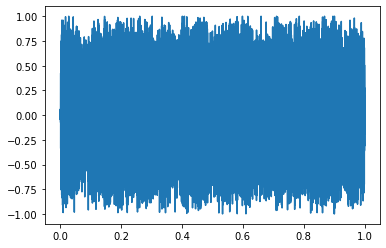

In [490]:
time = np.linspace(0, 1, 44100)
plt.plot(time, wave.squeeze().numpy())